<a href="https://colab.research.google.com/github/currencyfxjle/Pandas-y-NumPy-en-Pyhton/blob/main/DS_C3_SC1_Formato_Reto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DS_C3_SC1 - PLATAFORMAS DE VISUALIZACIÓN**

---

**Reto: Explorando el índice de felicidad**

NOMBRE DEL PARTICIPANTE: ------------------------------( Jose Antonio Lizarraga Esquer )------------------------------

1.	Genera una libreta en Google Colab para el reto, cuya estructura esté basada en los análisis solicitados.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

2.	Descarga el archivo: happiness_report.csv y guarda, en un dataframe (`happiness`), todos sus registros.

In [ ]:
df= pd.read_csv('/content/happiness_report.csv')

# Cargar el archivo CSV en un DataFrame
happiness = pd.read_csv('/content/happiness_report.csv')

In [ ]:
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [ ]:
df.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

3.	A partir del dataframe happiness obtén otro (`mexico`) donde sólo almacenes la información de México. Haz que la columna `Country or region` quede como índice.

In [ ]:
# Paso 4: Obtener el DataFrame "mexico" con la información de México
mexico = happiness[happiness['Country or region'] == 'Mexico'].set_index('Country or region')

4.	Obtén un histograma del puntaje (`score`) para identificar el rango o clase más frecuente. Ubica el valor de México con una etiqueta de texto.

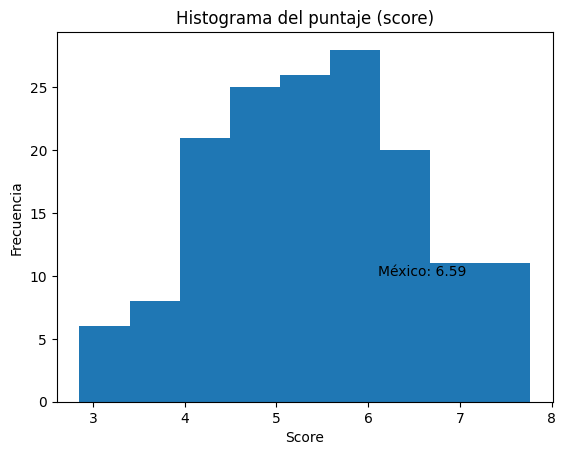

In [ ]:
# Obtener el histograma del puntaje (score)
plt.hist(happiness['Score'], bins='auto')  # Utilizar bins='auto' para determinar automáticamente el número óptimo de bins
plt.xlabel('Score')
plt.ylabel('Frecuencia')
plt.title('Histograma del puntaje (score)')

# Agregar una etiqueta para resaltar el valor de México en relación a los demás
score_mexico = mexico.loc['Mexico', 'Score']
plt.text(score_mexico, 10, f'México: {score_mexico:.2f}', ha='center')

plt.show()

5.	Construye un box plot para la columna esperanza de vida (`Healthy life expectancy`). Ubica el valor de México con una anotación.

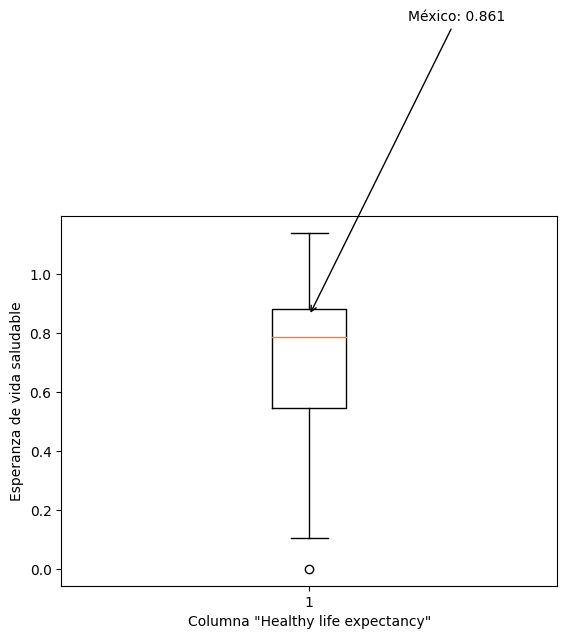

In [ ]:
# Construct the box plot for the column "Healthy life expectancy"
plt.boxplot(happiness['Healthy life expectancy'])
plt.xlabel('Columna "Healthy life expectancy"')
plt.ylabel('Esperanza de vida saludable')

# Annotate the value of Mexico
mexico_health_life = mexico.loc['Mexico', 'Healthy life expectancy']
plt.annotate(f'México: {mexico_health_life}', xy=(1, mexico_health_life), xytext=(1.2, mexico_health_life + 1),
             arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.show()

6.	Crea una gráfico circular para analizar en qué medida los factores contribuyen a evaluar la felicidad en México. Para ello, deberás modificar la estructura del dataframe `mexico` obtenido anteriormente.

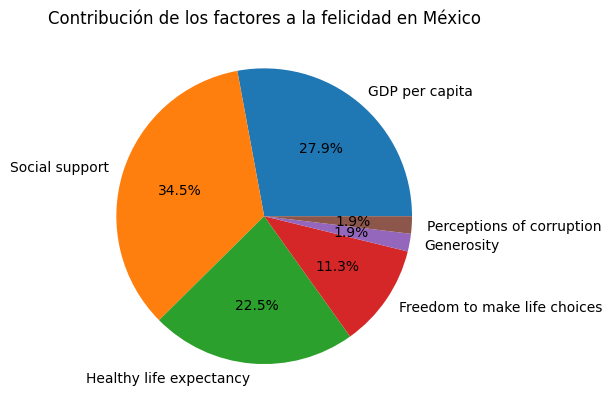

In [ ]:
# Obtener los factores y sus valores en México
factores = ['GDP per capita', 'Social support', 'Healthy life expectancy',
            'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']
valores = mexico.loc['Mexico', factores].values

# Crear la gráfica circular
plt.pie(valores, labels=factores, autopct='%1.1f%%')
plt.title('Contribución de los factores a la felicidad en México')

plt.show()

7.	Filtra el dataframe para quedarte con 5 países (el más feliz, el menos feliz, México y dos más de tu interés) y visualiza en una misma gráfica los 6 factores.

In [ ]:
# Ordenar el DataFrame por la columna "Score" en orden ascendente
df_sorted = df.sort_values(by='Score')

# Obtener el país más feliz (mayor puntaje)
pais_mas_feliz = df_sorted.iloc[-1]['Country or region']

# Obtener el país más triste (menor puntaje)
pais_mas_triste = df_sorted.iloc[0]['Country or region']

print(f"El país más feliz es: {pais_mas_feliz}")
print(f"El país más triste es: {pais_mas_triste}")


El país más feliz es: Finland
El país más triste es: South Sudan


In [ ]:
pais_mayor_pib = df.loc[df['GDP per capita'].idxmax()]['Country or region']
print(f"El país con el mayor PIB per cápita es: {pais_mayor_pib}")

El país con el mayor PIB per cápita es: Qatar


In [ ]:
pais_mayor_esperanza_vida = df.loc[df['Healthy life expectancy'].idxmax()]['Country or region']
print(f"El país con la mayor esperanza de vida es: {pais_mayor_esperanza_vida}")

El país con la mayor esperanza de vida es: Singapore


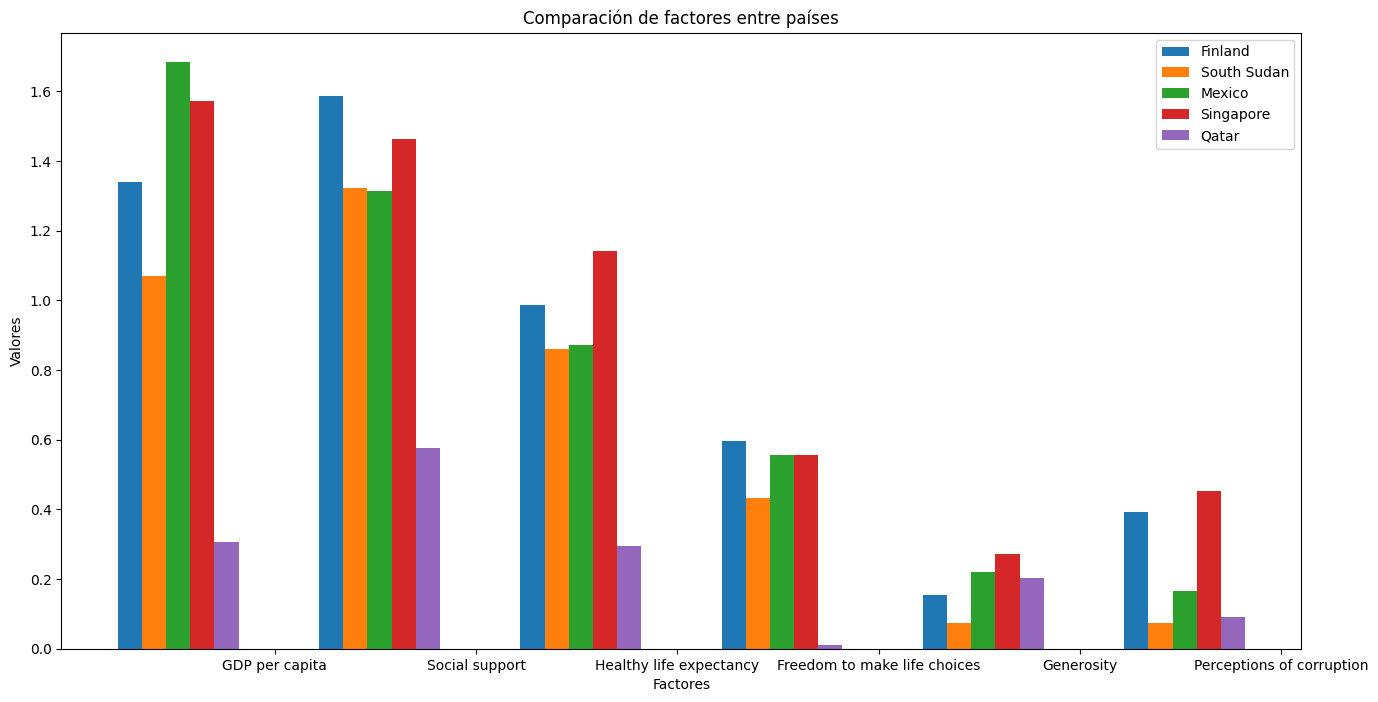

In [ ]:
# Filtrar el DataFrame para obtener los 5 países de interés
paises_interes = ['Finland', 'South Sudan', 'Mexico', 'Singapore', 'Qatar']
df_filt = df[df['Country or region'].isin(paises_interes)]

# Verificar si el DataFrame filtrado contiene los 5 países
if len(df_filt) != len(paises_interes):
    print("Error: No se encontraron todos los países de interés en el DataFrame.")
    # Puedes verificar los países que se encontraron en el DataFrame filtrado con:
    # print(df_filt['Country or region'])

else:
    # Configurar los factores y sus valores
    factores = ['GDP per capita', 'Social support', 'Healthy life expectancy',
                'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']
    valores = df_filt.loc[:, factores].values

    # Crear la gráfica de barras múltiples
    plt.figure(figsize=(16, 8))  # Tamaño de la figura
    bar_width = 0.12  # Ancho de las barras

    # Iterar sobre los países y sus valores
    for i, pais in enumerate(paises_interes):
        posicion_x = np.arange(len(factores)) + i * bar_width
        plt.bar(posicion_x, valores[i], width=bar_width, label=pais)

    # Configurar los ejes y la leyenda
    plt.xlabel('Factores')
    plt.ylabel('Valores')
    plt.title('Comparación de factores entre países')
    plt.xticks(posicion_x + bar_width * (len(paises_interes) - 1) / 2, factores)
    plt.legend()

    plt.show()

8.	Crea una matriz de subgráficas de 2 x 3 con scatter plots del puntaje (`score`) versus los 6 factores para determinar qué factor influye más en la evaluación.

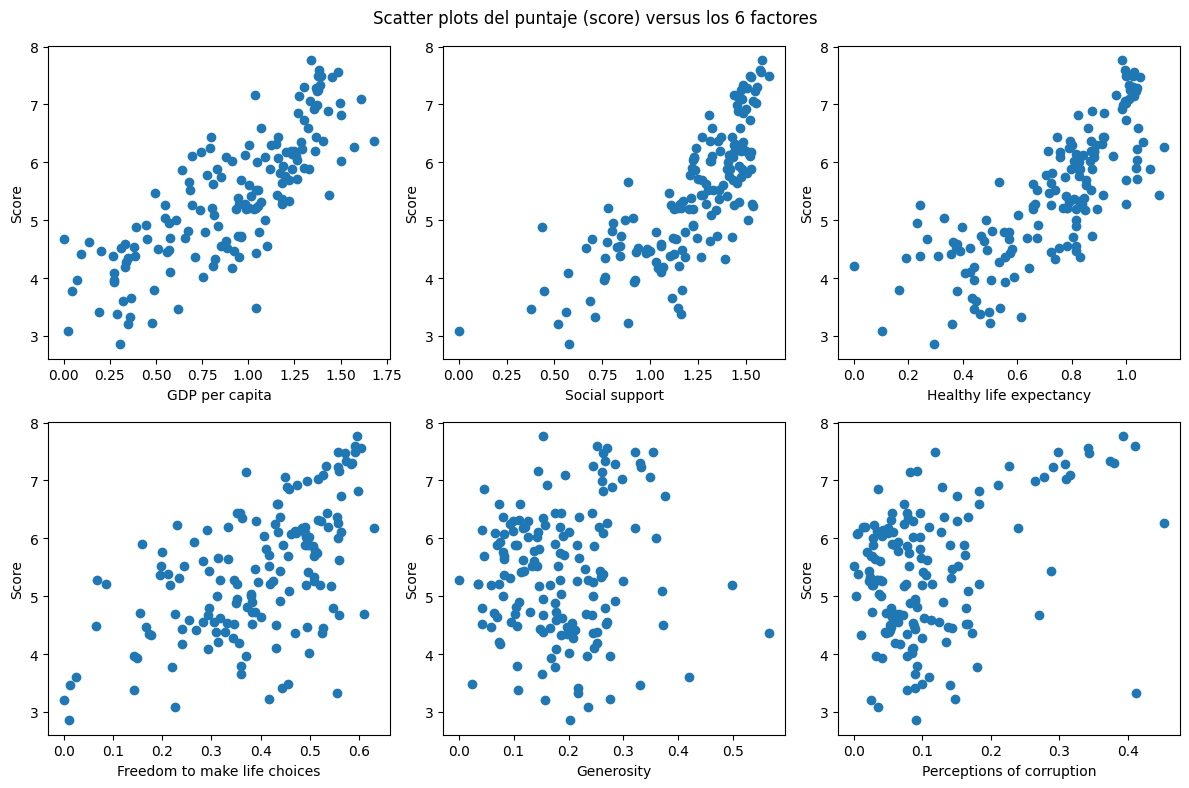

In [ ]:
import matplotlib.pyplot as plt

# Configurar la matriz de subgráficas
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
fig.suptitle('Scatter plots del puntaje (score) versus los 6 factores')

# Configurar los nombres de los factores
factores = ['GDP per capita', 'Social support', 'Healthy life expectancy',
            'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

# Iterar sobre las filas y columnas de la matriz de subgráficas
for i in range(2):
    for j in range(3):
        # Obtener el índice del factor actual en la lista de factores
        indice_factor = i * 3 + j

        # Obtener los datos del puntaje y el factor actual
        puntaje = df['Score']
        factor = df[factores[indice_factor]]

        # Crear el scatter plot en el subgráfico correspondiente
        axes[i, j].scatter(factor, puntaje)
        axes[i, j].set_xlabel(factores[indice_factor])
        axes[i, j].set_ylabel('Score')

# Ajustar la disposición de los subgráficos
plt.tight_layout()

# Mostrar la matriz de subgráficas
plt.show()

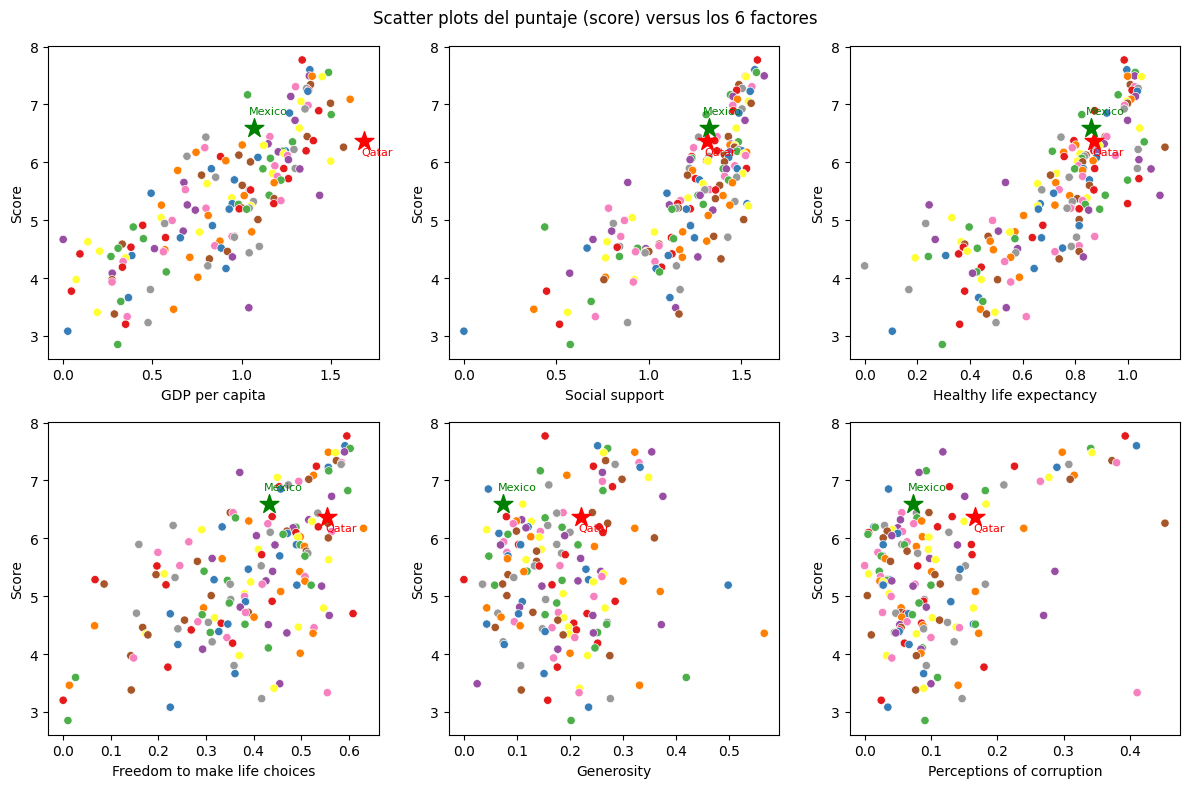

In [ ]:
import seaborn as sns

# Configurar la matriz de subgráficas
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
fig.suptitle('Scatter plots del puntaje (score) versus los 6 factores')

# Configurar los nombres de los factores
factores = ['GDP per capita', 'Social support', 'Healthy life expectancy',
            'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

# Obtener el índice del factor correspondiente al GDP per capita
indice_gdp = factores.index('GDP per capita')

# Iterar sobre las filas y columnas de la matriz de subgráficas
for i in range(2):
    for j in range(3):
        # Obtener el índice del factor actual en la lista de factores
        indice_factor = i * 3 + j

        # Obtener los datos del puntaje y el factor actual
        puntaje = df['Score']
        factor = df[factores[indice_factor]]

        # Crear el scatter plot en el subgráfico correspondiente
        sns.scatterplot(x=factor, y=puntaje, hue=df['Country or region'],
                        ax=axes[i, j], palette='Set1', legend=False)
        axes[i, j].set_xlabel(factores[indice_factor])
        axes[i, j].set_ylabel('Score')

        # Resaltar el país con el mayor GDP per capita
        max_gdp = df.loc[df['GDP per capita'].idxmax()]
        max_gdp_factor = max_gdp[factores[indice_factor]]
        max_gdp_score = max_gdp['Score']
        axes[i, j].scatter(max_gdp_factor, max_gdp_score, marker='*', s=200, color='red')

        # Resaltar México
        mexico = df[df['Country or region'] == 'Mexico']
        mexico_factor = mexico[factores[indice_factor]].values
        mexico_score = mexico['Score'].values
        axes[i, j].scatter(mexico_factor, mexico_score, marker='*', s=200, color='green')

        # Obtener los nombres de los países resaltados
        pais_resaltado = max_gdp['Country or region']
        pais_mexico = mexico['Country or region'].values[0]

        # Mostrar etiquetas para los países resaltados
        axes[i, j].annotate(pais_resaltado, (max_gdp_factor, max_gdp_score),
                            xytext=(10, -10), textcoords='offset points',
                            fontsize=8, ha='center', color='red')
        axes[i, j].annotate(pais_mexico, (mexico_factor, mexico_score),
                            xytext=(10, 10), textcoords='offset points',
                            fontsize=8, ha='center', color='green')

# Ajustar la disposición de los subgráficos
plt.tight_layout()

# Mostrar la matriz de subgráficas
plt.show()


9.	Comprueba lo anterior con un heatmap donde incluyas los índices de correlación.

<ipython-input-44-97ca31ee1f5c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matriz_correlacion = df.corr()


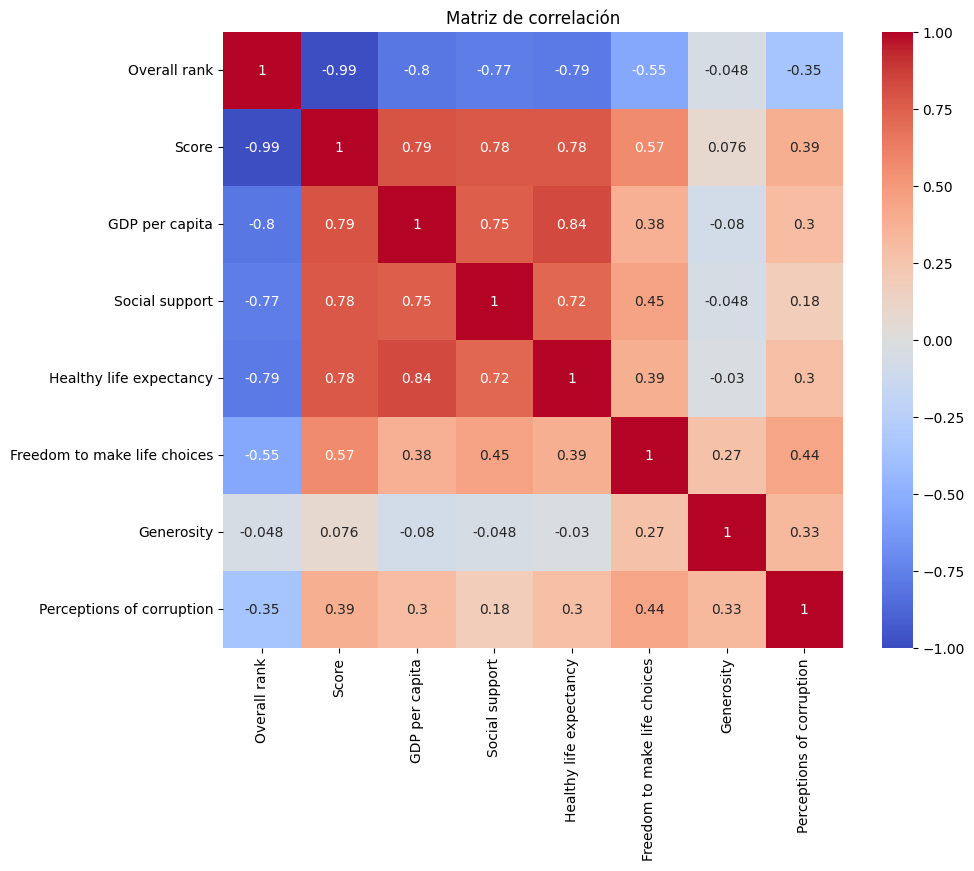

In [ ]:
# Calcular la matriz de correlación
matriz_correlacion = df.corr()

# Configurar el tamaño de la figura
plt.figure(figsize=(10, 8))

# Generar el heatmap
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Configurar el título del heatmap
plt.title('Matriz de correlación')

# Mostrar el heatmap
plt.show()


10.	Combina con el dataframe `metada` (Metadata.csv) para graficar la felicidad promedio por región.

In [2]:
!pip install xlsxwriter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.0/153.0 kB 12.1 MB/s eta 0:00:00


In [3]:
import pandas as pd

# Leer los archivos CSV
happiness = pd.read_csv('/content/happiness_report.csv')
metadata = pd.read_csv('/content/Metadata.csv')

# Crear un objeto ExcelWriter para guardar el resultado en un archivo de Excel
excel_writer = pd.ExcelWriter('/content/combined_data.xlsx', engine='xlsxwriter')

# Guardar los DataFrames en hojas separadas en el archivo de Excel
happiness.to_excel(excel_writer, sheet_name='Happiness Report', index=False)
metadata.to_excel(excel_writer, sheet_name='Metadata', index=False)

# Guardar y cerrar el archivo de Excel
excel_writer.save()
excel_writer.close()

<ipython-input-3-49b64359b97d>:15: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  excel_writer.save()
/usr/local/lib/python3.10/dist-packages/xlsxwriter/workbook.py:339: UserWarning: Calling close() on already closed file.
  warn("Calling close() on already closed file.")


In [26]:
from google.colab import files

# Specify the file path of the Excel file
file_path = '/content/combined_data.xlsx'

# Download the Excel file
files.download(file_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Vlookup Excel...

In [27]:
# Read the first tab into a DataFrame
df1 = pd.read_excel('/content/combined_data_2.xlsx', sheet_name='Happiness Report')


In [28]:
df1.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Region'],
      dtype='object')

In [30]:
# Calculate the average happiness score by region
average_scores = df1.groupby('Region')['Score'].mean()

# Print the average scores
print(average_scores)


Region
East Asia & Pacific           5.658769
Europe & Central Asia         6.104174
Latin America & Caribbean     6.007579
Middle East & North Africa    5.757429
North America                 7.085000
South Asia                    4.526857
Sub-Saharan Africa            4.260000
Name: Score, dtype: float64


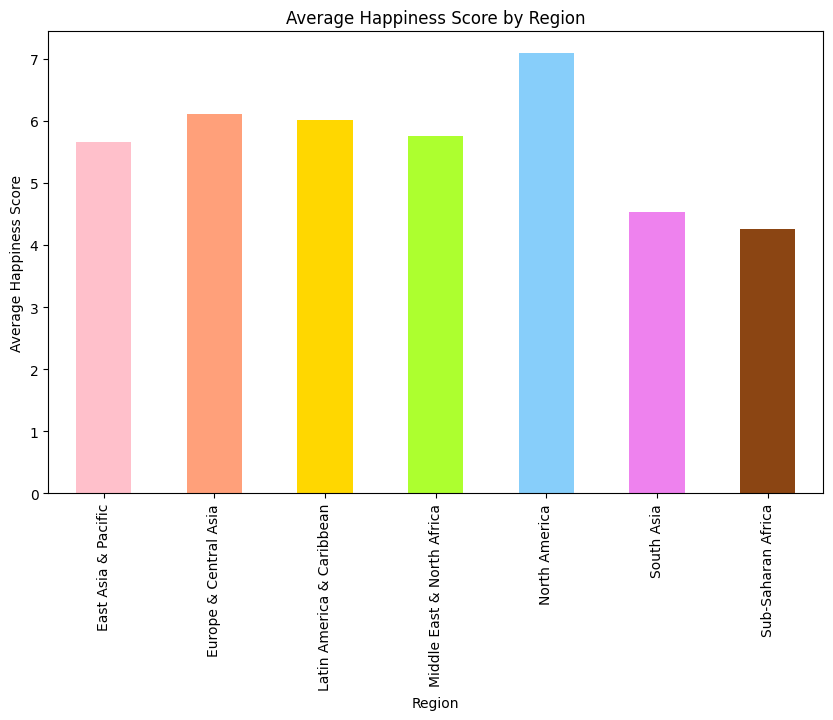

In [36]:
import matplotlib.pyplot as plt

# Calculate the average happiness score by region
average_scores = df1.groupby('Region')['Score'].mean()

# Define a custom color palette
colors = ['#FFC0CB', '#FFA07A', '#FFD700', '#ADFF2F', '#87CEFA', '#EE82EE', '#8B4513']

# Create a bar plot of the average scores with custom colors
average_scores.plot(kind='bar', figsize=(10, 6), color=average_scores.index.map(dict(zip(average_scores.index, colors))))
plt.xlabel('Region')
plt.ylabel('Average Happiness Score')
plt.title('Average Happiness Score by Region')

# Show the plot
plt.show()
